# Partie 2

L’objectif est ici d'etudier un cas préesentant un problème de prédiction que ce soit dans le cadre de
la régression ou de la catégorisation. Vous devrez pour cela implémenter le code permettant de mettre
en oeuvre les points suivants :

— La lecture des données (que vous fournirez avec votre dossier en format .csv ou .xls ou .RData).  
— Le pré-traitement des données si nécessaire.  

— La validation croisée permettant d’évaluer les performances des méthodes suivantes :
— Modèle linéaire pénalisé par une fonction de régularisation elasticnet.  
— Réseau de neuronnes avec une couche cachée.  
— SVM.  

— Autre m´ethode de votre choix sortant des techniques vues en cours (optionel).  
Pour chaque type de méthode, vous testerez plusieurs ensembles de paramètres.  


— Des graphiques permettant de comparer les résultats de chaque méthode avec les différents paramètres utilisés. 
— Des graphiques permettant de comparer les meilleurs modèles des trois types de méthodes.  

## Lecture des données

Notre jeu de données porte sur les haricots secs. 

Il comporte 13 611 observations (grains) pour 7 espèces différentes sur lesquelles nous souhaitons faire de la classification.

Les données ont été obtenues après des étapes de segmentation et d'extraction de caractéristiques sur des images prises par un système de vision par ordinateur utilisant une caméra haute résolution.

Les variables explicatives sont au nombre de 16 et sont relatives aux caractéristiques des grains : 

1.) Area (A): La surface d'une zone de haricot et le nombre de pixels à l'intérieur de ses limites.

2.) Perimeter (P): La circonférence d'un haricot est définie comme la longueur de sa bordure.

3.) Major axis length (L): La distance entre les extrémités de la ligne la plus longue qui peut être tracée à partir d'un haricot.

4.) Minor axis length (l): La plus longue ligne que l'on peut tracer à partir d'un haricot en étant perpendiculaire à l'axe principal.

5.) Aspect ratio (K): Définit la relation entre L et l.

6.) Eccentricity (Ec): Excentricité de l'ellipse ayant les mêmes moments que la région.

7.) Convex area (C): Nombre de pixels dans le plus petit polygone convexe qui peut contenir la surface d'une graine de haricot.

8.) Equivalent diameter (Ed): Le diamètre d'un cercle ayant la même surface que celle d'une graine de haricot.

9.) Extent (Ex): Le rapport entre les pixels de la boîte englobante et la surface du haricot.

10.) Solidity (S): Le rapport entre les pixels de la coquille convexe et ceux que l'on trouve dans les haricots.

11.) Roundness (R): Calculée à l'aide de la formule suivante : (4piA)/(P^2)

12.)Compactness (CO): Mesure la rondeur d'un objet : Ed/L

13.)ShapeFactor1 (SF1) = L/A

14.)ShapeFactor2 (SF2) = l/A

15.)ShapeFactor3 (SF3)

16.)ShapeFactor4 (SF4)

17.) Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [36]:
library(caret)
library(xlsx)
library(ggplot2)
library(lessR)
library(Hmisc)
library(dplyr)

library(neuralnet)
library(MLmetrics)
library(pROC)
library(e1071)
library(caTools)


Attachement du package : 'neuralnet'


L'objet suivant est masqué depuis 'package:dplyr':

    compute


Type 'citation("pROC")' for a citation.


Attachement du package : 'pROC'


Les objets suivants sont masqués depuis 'package:stats':

    cov, smooth, var




In [2]:
data = read.xlsx('Dry_Bean_Dataset.xlsx',sheetIndex = 1,stringsAsFactors=TRUE)

In [4]:
head(data)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
2,28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
3,29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
4,30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
5,30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908933,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
6,30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER


In [5]:
dim(data)

[1] 13611    17

In [6]:
summary(data)

      Area          Perimeter      MajorAxisLength MinorAxisLength
 Min.   : 20420   Min.   : 524.7   Min.   :183.6   Min.   :122.5  
 1st Qu.: 36328   1st Qu.: 703.5   1st Qu.:253.3   1st Qu.:175.8  
 Median : 44652   Median : 794.9   Median :296.9   Median :192.4  
 Mean   : 53048   Mean   : 855.3   Mean   :320.1   Mean   :202.3  
 3rd Qu.: 61332   3rd Qu.: 977.2   3rd Qu.:376.5   3rd Qu.:217.0  
 Max.   :254616   Max.   :1985.4   Max.   :738.9   Max.   :460.2  
                                                                  
  AspectRation    Eccentricity      ConvexArea     EquivDiameter  
 Min.   :1.025   Min.   :0.2190   Min.   : 20684   Min.   :161.2  
 1st Qu.:1.432   1st Qu.:0.7159   1st Qu.: 36715   1st Qu.:215.1  
 Median :1.551   Median :0.7644   Median : 45178   Median :238.4  
 Mean   :1.583   Mean   :0.7509   Mean   : 53768   Mean   :253.1  
 3rd Qu.:1.707   3rd Qu.:0.8105   3rd Qu.: 62294   3rd Qu.:279.4  
 Max.   :2.430   Max.   :0.9114   Max.   :263261   Max.   :569

In [7]:
# test si présence de valeurs manquantes
sum(!complete.cases(data))

[1] 0

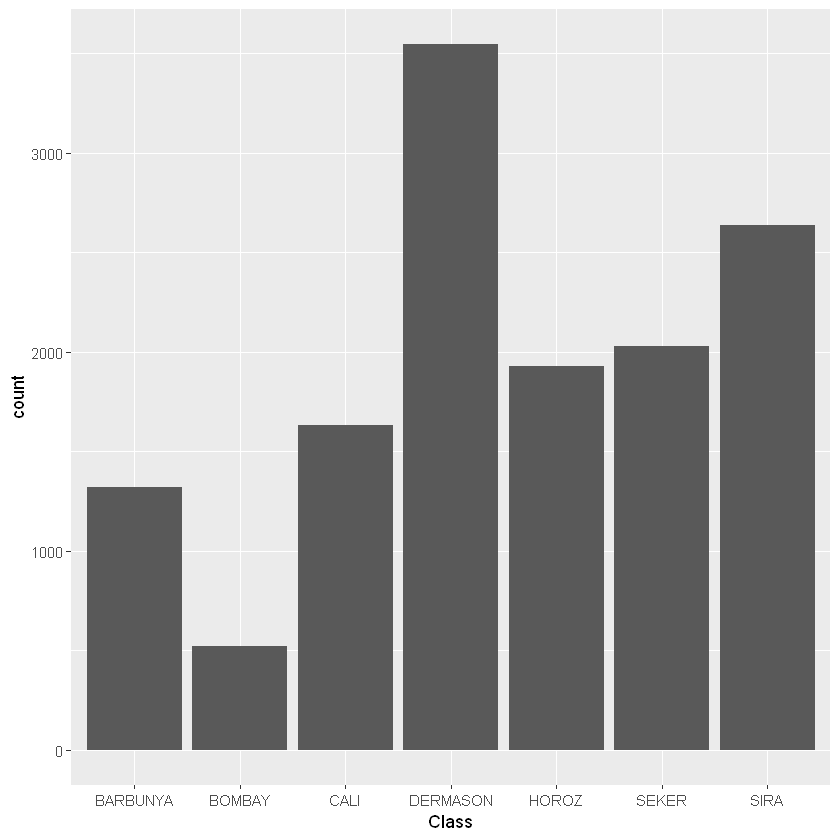

In [8]:
ggplot(data = data, aes(x = Class)) +
    geom_bar()

In [9]:
X = data[,c(1:16)]
y = data[,17]

In [10]:
PieChart(Class, hole = 0, values = "%", data = data, main = "")

>>> Suggestions
PieChart(Class, hole=0)  # traditional pie chart
PieChart(Class, values="%")  # display %'s on the chart
BarChart(Class)  # bar chart
Plot(Class)  # bubble plot
Plot(Class, values="count")  # lollipop plot 

--- Class --- 

   Class   Count   Prop 
------------------------ 
BARBUNYA    1322   0.097 
  BOMBAY     522   0.038 
    CALI    1630   0.120 
DERMASON    3546   0.261 
   HOROZ    1928   0.142 
   SEKER    2027   0.149 
    SIRA    2636   0.194 
------------------------ 
   Total   13611   1.000 

Chi-squared test of null hypothesis of equal probabilities 
  Chisq = 2859.439, df = 6, p-value = 0.000 




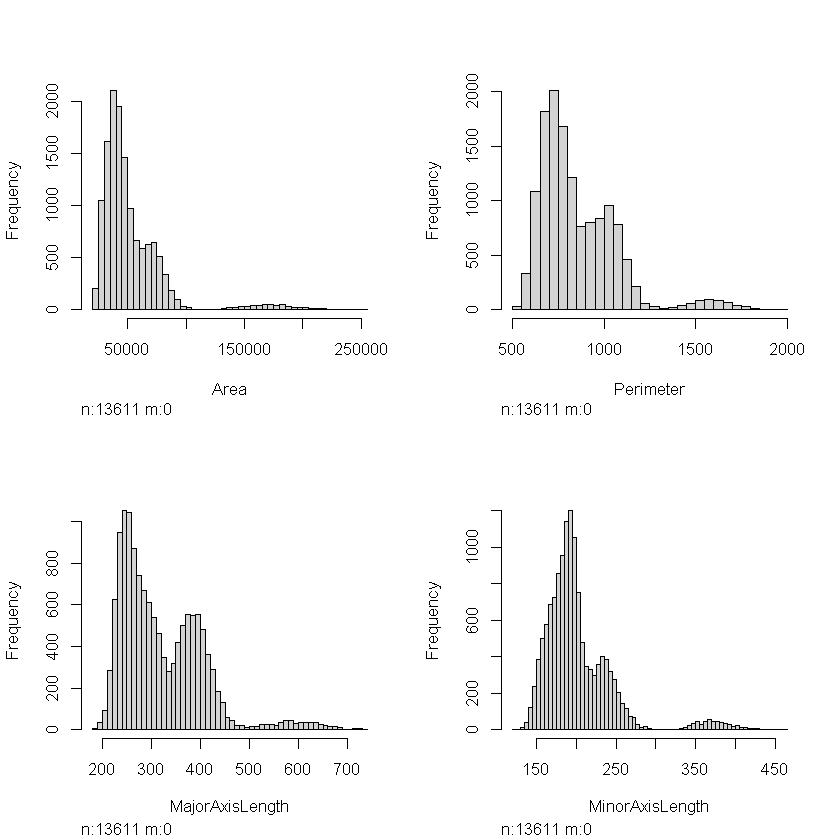

In [11]:
hist.data.frame(X[,c(1:4)])

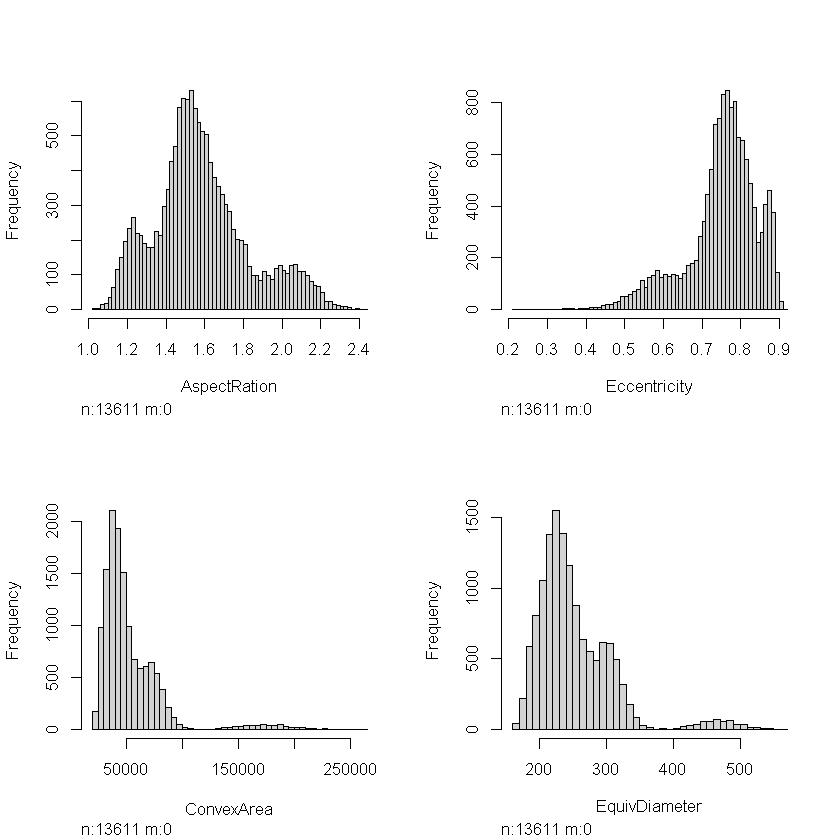

In [12]:
hist.data.frame(X[,c(5:8)])

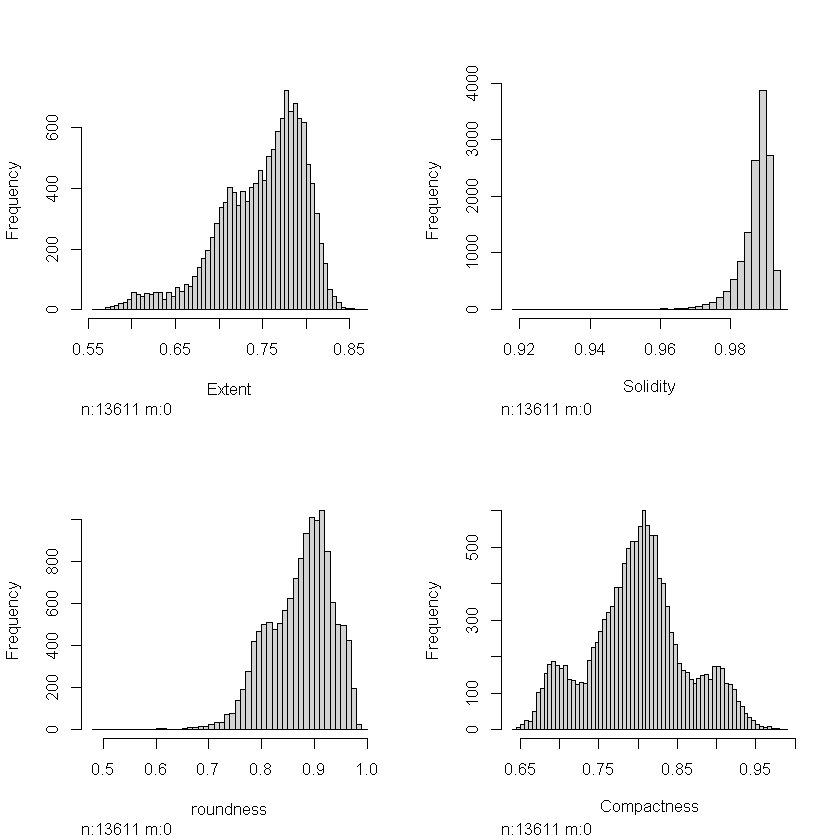

In [13]:
hist.data.frame(X[,c(9:12)])

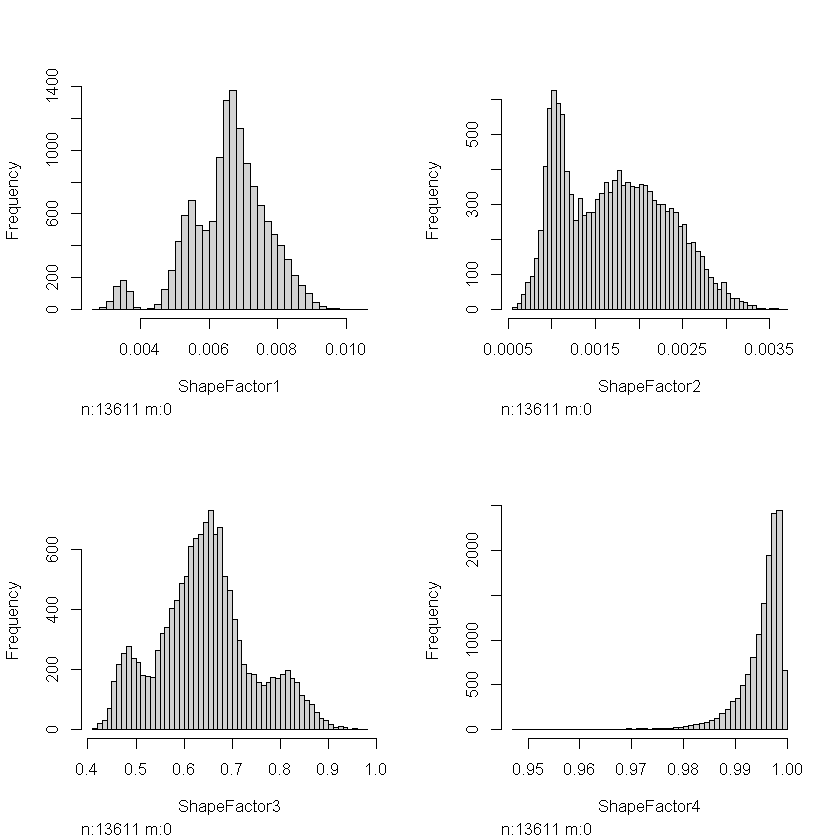

In [14]:
hist.data.frame(X[,c(13:16)])

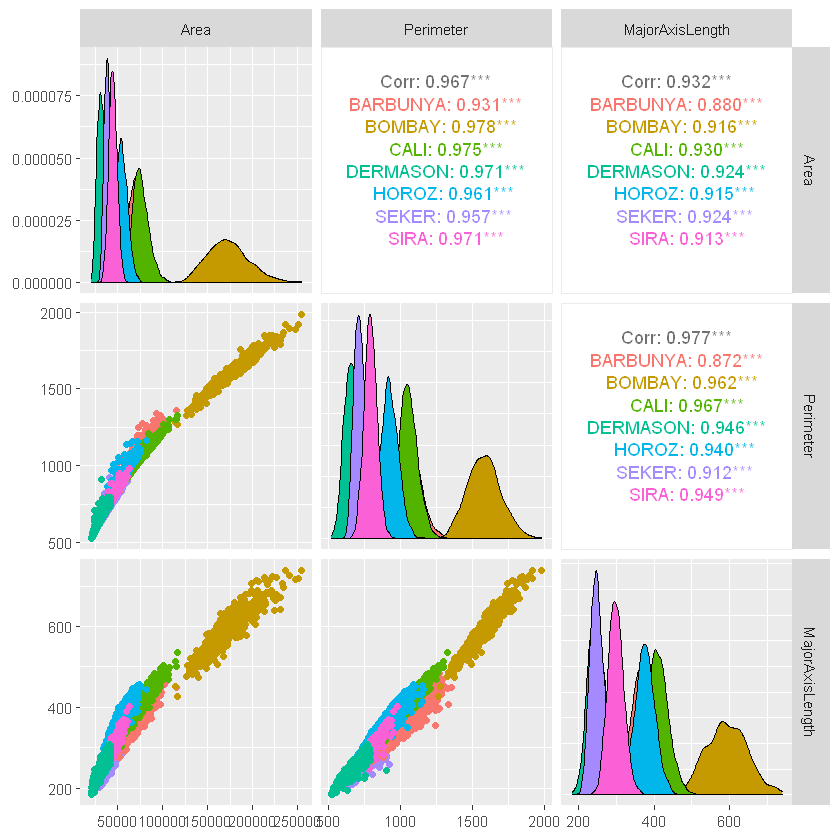

In [18]:
library(GGally)
 
ggpairs(data, columns = 1:3, ggplot2::aes(colour=Class)) 

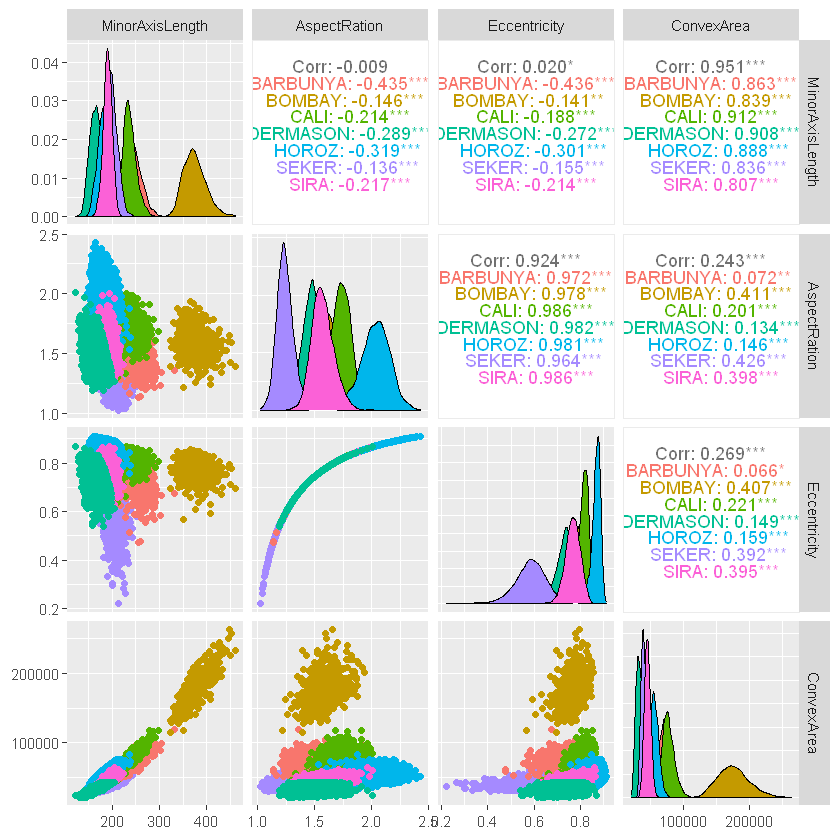

In [16]:
ggpairs(data, columns = 4:7, ggplot2::aes(colour=Class))

In [3]:
trainIndex <- createDataPartition(data$Class,p=0.7,list=F)

Train<- data[trainIndex,]
Test <- data[-trainIndex,]

XTrain <- Train[,c(1:16)]
yTrain <- Train[,"Class"] 

XTest <- Test[,c(1:16)]
yTest <- Test[,"Class"] 


preprocessParams <- preProcess(Train[,c(1:16)], method=c("center","scale"))
XTrain_scaled <- predict(preprocessParams,Train[,c(1:16)])
XTest_scaled <- predict(preprocessParams,Test[,c(1:16)])

In [21]:
# Distribution des classes dans les données de Train 
print(table(yTrain))

yTrain
BARBUNYA   BOMBAY     CALI DERMASON    HOROZ    SEKER     SIRA 
     926      366     1141     2483     1350     1419     1846 


In [22]:
# Distribution des classes dans les données de test 
print(table(yTest))

yTest
BARBUNYA   BOMBAY     CALI DERMASON    HOROZ    SEKER     SIRA 
     396      156      489     1063      578      608      790 


## Modèle linéaire pénalisé par une fonction de régularisation elasticnet.

In [4]:
train_control <- trainControl(
  method="cv",
  number=5,
  summaryFunction = multiClassSummary,
  classProbs = TRUE,
)

grid <- expand.grid(
  alpha = seq(0,1,by=0.1),
  lambda = seq(0.0001,0.1,length=20)
)

In [5]:
set.seed(42)

glmnet <- train(Class~.,
               data=Train, 
               method="glmnet",
               family = "multinomial",
               preProcess = c("center", "scale"), 
               tuneGrid = grid,
               metric = "Accuracy",
               trControl = train_control)

In [108]:
prob = predict(glmnet, newdata = XTest,type="prob")
pred = predict(glmnet, newdata = XTest)

auc_glm = multiclass.roc(yTest~as.matrix(prob),plot=FALSE)
#Matrice de confusion
cm_glm = table(pred, yTest)
print(cm)

#Taux d'erreur
err = ((cm[1,2] + cm[2,1])/sum(cm))*100
accuracy_glm = 1-err
# F1 score
f1_glm=F1_Score(yTest, pred, positive = NULL)

          yTest
pred       BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA
  BARBUNYA      356      0   14        0     1     5    1
  BOMBAY          0    156    0        0     0     0    0
  CALI           23      0  461        0     3     0    1
  DERMASON        0      0    0      980    10     9   62
  HOROZ           3      0    9        2   552     0   14
  SEKER           3      0    0       15     0   573    8
  SIRA           11      0    5       66    12    21  704


In [116]:
print(accuracy_glm)
print(auc_glm)
print(f1_glm)

[1] 1

Call:
multiclass.roc.formula(formula = yTest ~ as.matrix(prob), plot = FALSE)

Data: multivariate predictor as.matrix(prob) with 7 levels of yTest: BARBUNYA, BOMBAY, CALI, DERMASON, HOROZ, SEKER, SIRA.
Multi-class area under the curve: 0.9954
[1] 0.9210867


In [111]:
print(glmnet)

glmnet 

9531 samples
  16 predictor
   7 classes: 'BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA' 

Pre-processing: centered (16), scaled (16) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7625, 7625, 7625, 7625, 7624 
Resampling results across tuning parameters:

  alpha  lambda       logLoss    AUC        prAUC      Accuracy   Kappa    
  0.0    0.000100000  0.4066902  0.9934231  0.9673025  0.9134401  0.8951883
  0.0    0.005357895  0.4066902  0.9934231  0.9673025  0.9134401  0.8951883
  0.0    0.010615789  0.4066902  0.9934231  0.9673025  0.9134401  0.8951883
  0.0    0.015873684  0.4066902  0.9934231  0.9673025  0.9134401  0.8951883
  0.0    0.021131579  0.4066902  0.9934231  0.9673025  0.9134401  0.8951883
  0.0    0.026389474  0.4066902  0.9934231  0.9673025  0.9134401  0.8951883
  0.0    0.031647368  0.4238418  0.9933044  0.9667488  0.9114466  0.8927472
  0.0    0.036905263  0.4448989  0.9931470  0.9659596  0.9107123  0.8918297
  0.0    0.04

In [112]:
glmnet$bestTune$lambda

[1] 0.0001

In [113]:
glmnet$bestTune$alpha

[1] 1

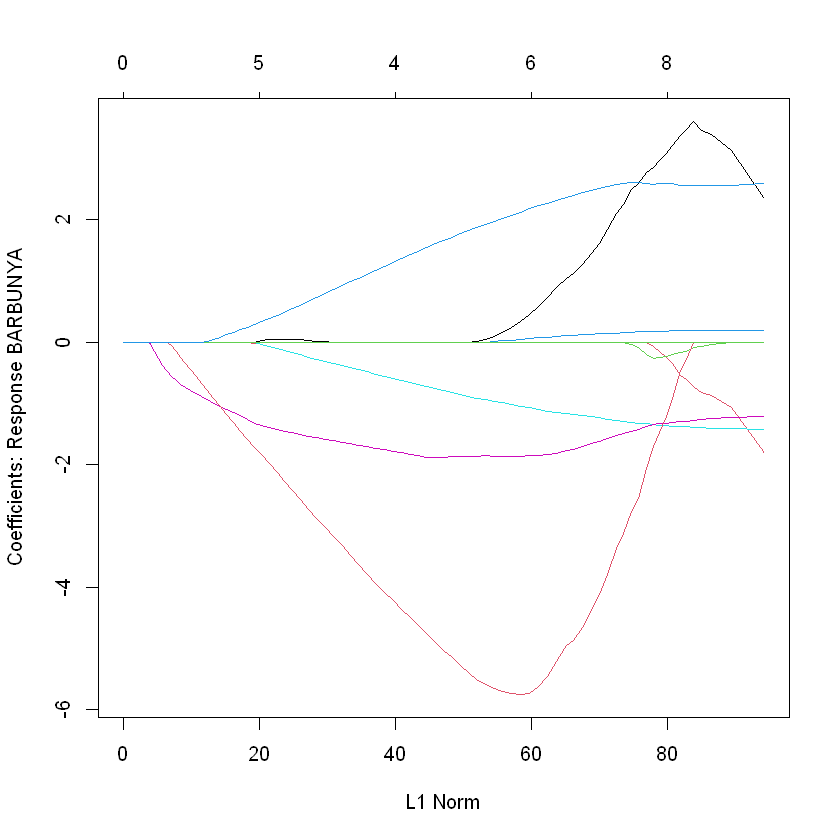

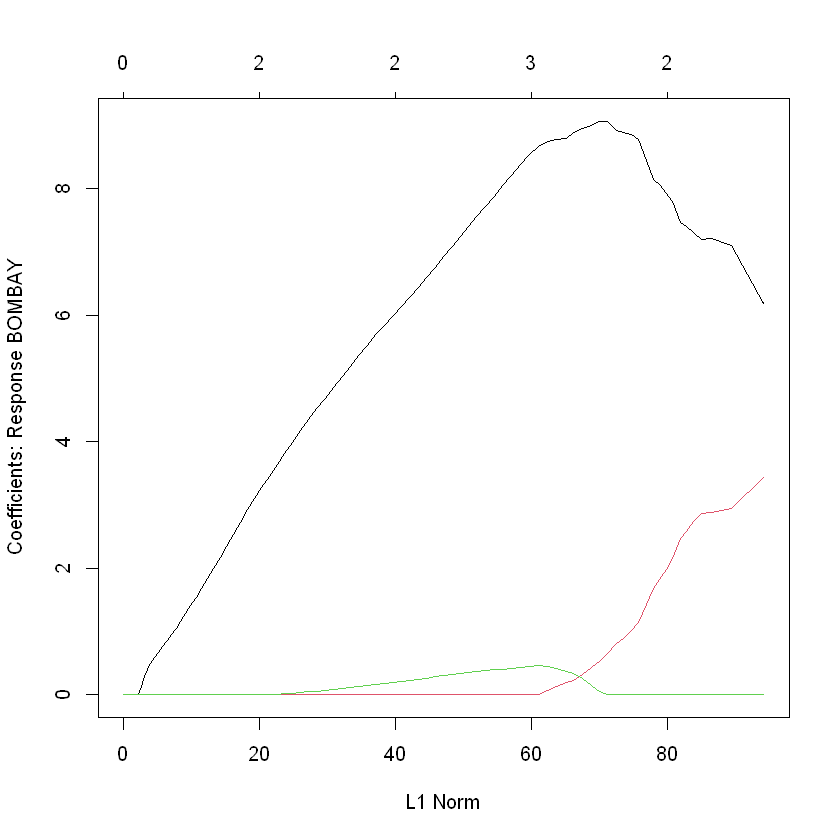

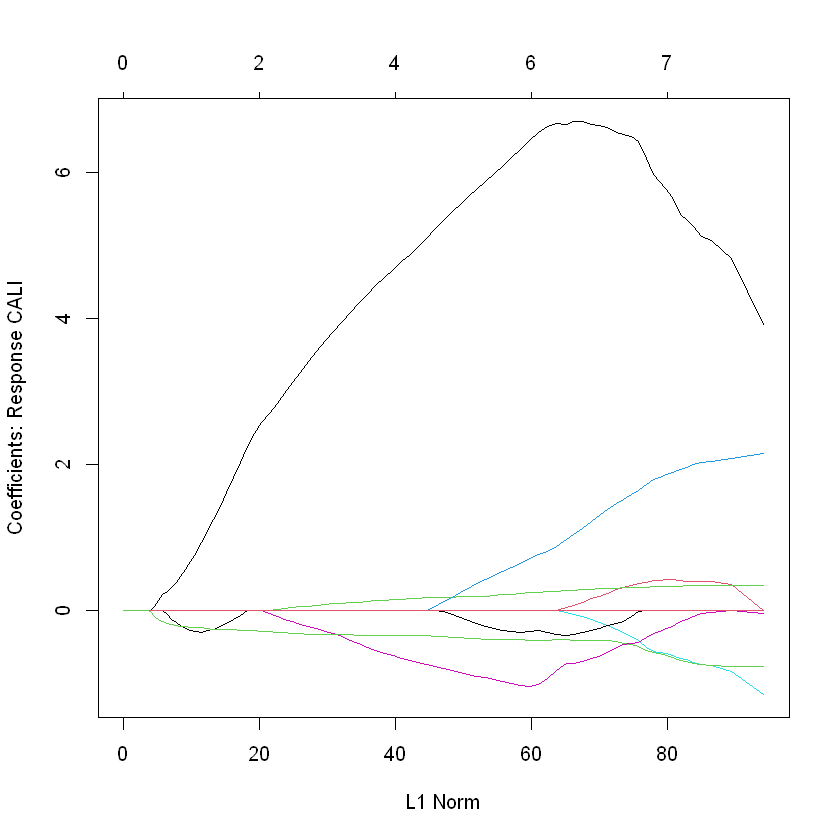

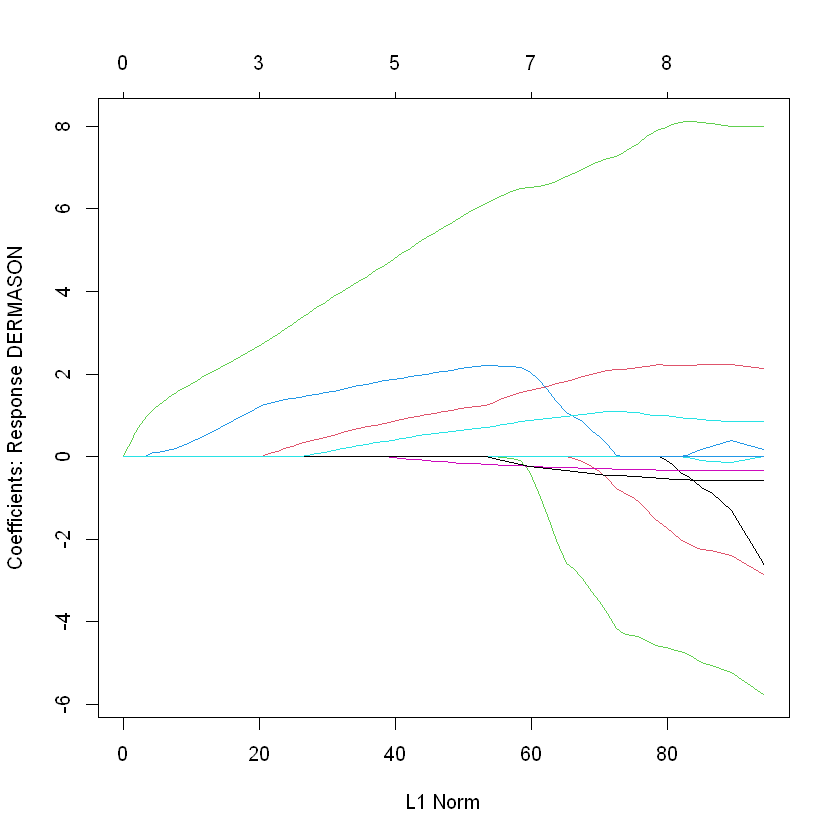

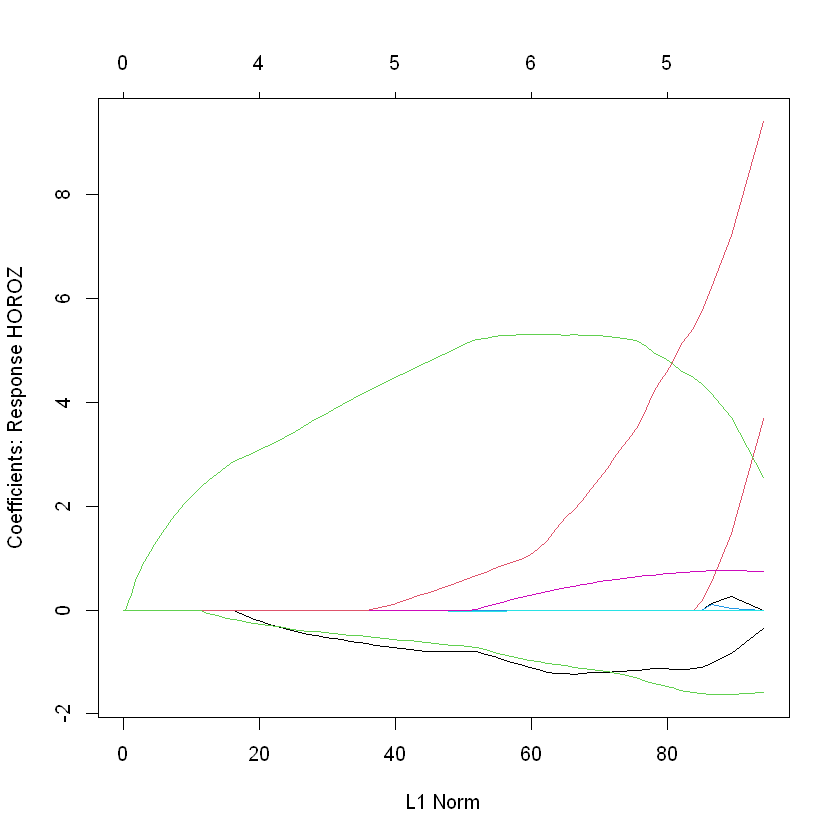

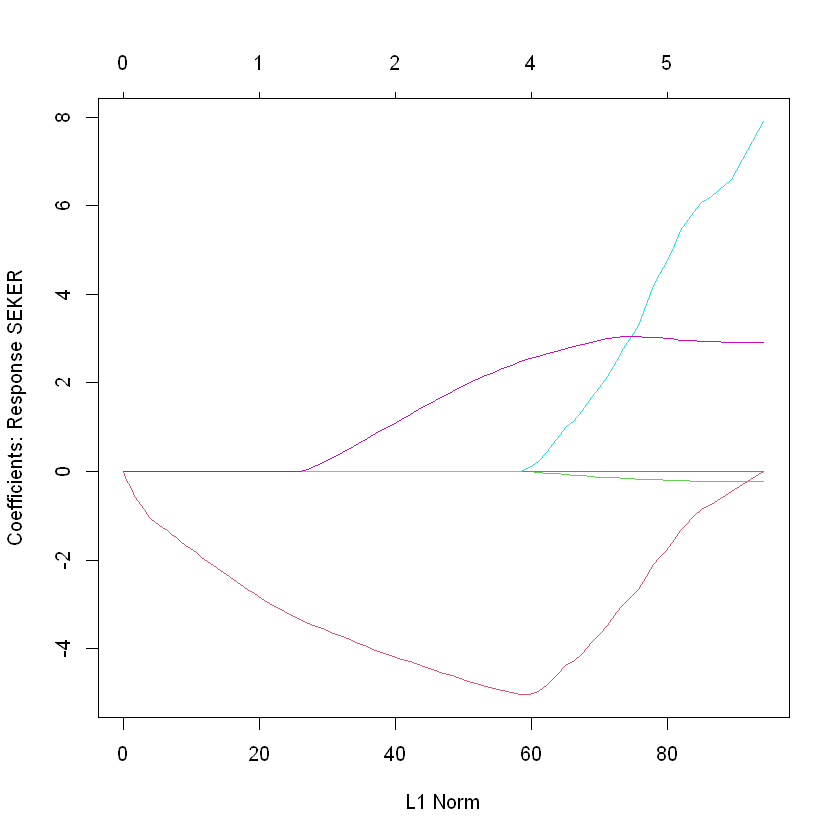

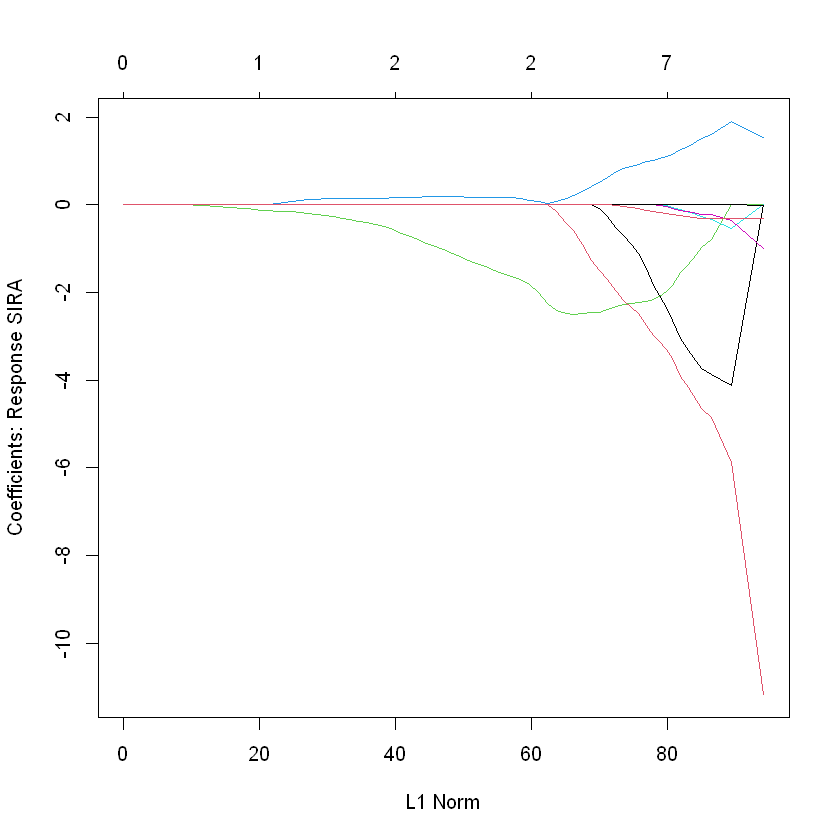

In [11]:
plot(glmnet$finalModel)

In [118]:
pred <- predict(glmnet,newdata = XTest)

In [115]:
mean(predicted.class == Test$Class)

[1] 0.9269608

### Matrice de confusion

In [119]:
cm_glmnet = confusionMatrix(as.factor(pred), Test$Class, positive = NULL, dnn = c("Prediction", "Reference"))
cm_glmnet

Confusion Matrix and Statistics

          Reference
Prediction BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA
  BARBUNYA      356      0   14        0     1     5    1
  BOMBAY          0    156    0        0     0     0    0
  CALI           23      0  461        0     3     0    1
  DERMASON        0      0    0      980    10     9   62
  HOROZ           3      0    9        2   552     0   14
  SEKER           3      0    0       15     0   573    8
  SIRA           11      0    5       66    12    21  704

Overall Statistics
                                               
               Accuracy : 0.927                
                 95% CI : (0.9185, 0.9348)     
    No Information Rate : 0.2605               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.9116               
                                               
 Mcnemar's Test P-Value : NA                   

Statistics by Class:

        

In [120]:
prob = predict(glmnet, newdata = XTest,type="prob")
auc_glm = multiclass.roc(yTest~as.matrix(prob),plot=FALSE)

# Accuracy
accuracy_glm = cm_glmnet$overall['Accuracy']

#F1_score 
f1_glm=F1_Score(yTest, pred, positive = NULL)

In [121]:
print(auc_glm)
print(accuracy_glm)
print(f1_glm)


Call:
multiclass.roc.formula(formula = yTest ~ as.matrix(prob), plot = FALSE)

Data: multivariate predictor as.matrix(prob) with 7 levels of yTest: BARBUNYA, BOMBAY, CALI, DERMASON, HOROZ, SEKER, SIRA.
Multi-class area under the curve: 0.9954
 Accuracy 
0.9269608 
[1] 0.9210867


## SVM

In [ ]:
## Ne pas exécuter
## Le meilleur modèle est C = 7 et kernel = radial

tuned = tune(svm,train.x=as.matrix(XTrain_scaled),
train.y=yTrain, data = data,
scale=F, type = "C-classification",
ranges = list(cost=seq(0.1, 10, 0.1),kernel= c("linear","radial","sigmoid","polynomial")),
tunecontrol=tune.control(cross=10))
tuned$performances

In [83]:
svm = svm(as.matrix(XTrain), yTrain, scale=T, type= "C-classification",kernel='radial',cost = 7,probability = TRUE)

In [156]:
pred = predict(svm, newdata = as.matrix(XTest),probability = TRUE)
auc_svm = multiclass.roc(yTest~attr(pred,"probabilities"),plot=FALSE)

#Matrice de confusion
cm = confusionMatrix(as.factor(pred), Test$Class, positive = NULL, dnn = c("Prediction", "Reference"))
print(cm)

accuracy_svm = cm$overall['Accuracy']

# F1 score
f1_svm=F1_Score(yTest, pred, positive = NULL)

Confusion Matrix and Statistics

          Reference
Prediction BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA
  BARBUNYA      362      0   16        0     1     2    7
  BOMBAY          0    156    0        0     0     0    0
  CALI           20      0  467        0     8     0    0
  DERMASON        0      0    0      995    10    11   69
  HOROZ           3      0    4        2   547     0    9
  SEKER           2      0    0       12     0   578    7
  SIRA            9      0    2       54    12    17  698

Overall Statistics
                                               
               Accuracy : 0.9321               
                 95% CI : (0.924, 0.9396)      
    No Information Rate : 0.2605               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.9178               
                                               
 Mcnemar's Test P-Value : NA                   

Statistics by Class:

        

In [84]:
pred = predict(svm, newdata = as.matrix(XTest),probability = TRUE)

In [90]:
auc_svm = multiclass.roc(yTest~attr(pred,"probabilities"),plot=FALSE)


Call:
multiclass.roc.formula(formula = yTest ~ attr(pred, "probabilities"),     plot = FALSE)

Data: multivariate predictor attr(pred, "probabilities") with 7 levels of yTest: SEKER, BARBUNYA, BOMBAY, CALI, HOROZ, SIRA, DERMASON.
Multi-class area under the curve: 0.9956

In [54]:
pred=as.numeric(pred)
auc_svm=colAUC(pred, yTest, plotROC = F)
#abline(0,1, col = "blue")

In [63]:
colMeans(auc_svm)

[1] 0.9581064

In [ ]:
rocurve = multiclass.roc(y_test , prob_cv, levels=levels(y_test)) 

# Neurones : 

In [123]:
y <- as.factor(make.names(Train$Class))

In [125]:
XTrain_scaled$y <- y

In [126]:
ctrl  <- trainControl(method  = "cv",number  = 5, 
                     summaryFunction = multiClassSummary, # Multiple metrics
                     classProbs=T,# Required for the ROC curves
                     savePredictions = T,
                     )

set.seed(150)

mygrid <- expand.grid(.decay = c(1, 0.5, 0.3, 0.1, 0.001), .size = c(10, 12, 14,16))
#decay is the regularization parameter to avoid over-fitting

fit.mlp <- train(y~.-y, data = XTrain_scaled, 
                 method = "nnet",
                 trControl = ctrl, 
                 act.fct= "logistic",
                 maxit = 250,    # Maximum number of iterations
                 tuneGrid = mygrid, #data.frame(size = 10, decay = 0),
                 metric = "Accuracy", linout = FALSE)



# weights:  247
initial  value 15675.027659 
iter  10 value 3950.321505
iter  20 value 2937.564001
iter  30 value 2722.966695
iter  40 value 2453.419919
iter  50 value 2260.809064
iter  60 value 2107.598740
iter  70 value 2025.898662
iter  80 value 1968.885583
iter  90 value 1931.774001
iter 100 value 1917.089792
iter 110 value 1899.519119
iter 120 value 1890.469787
iter 130 value 1886.885779
iter 140 value 1885.042284
iter 150 value 1883.774541
iter 160 value 1880.090259
iter 170 value 1874.629254
iter 180 value 1863.019675
iter 190 value 1859.350648
iter 200 value 1854.610708
iter 210 value 1852.677240
iter 220 value 1852.063921
iter 230 value 1851.580280
iter 240 value 1851.341062
iter 250 value 1851.192535
final  value 1851.192535 
stopped after 250 iterations
# weights:  247
initial  value 19531.836277 
iter  10 value 4272.989698
iter  20 value 2408.397325
iter  30 value 2183.257926
iter  40 value 2097.987935
iter  50 value 1961.918868
iter  60 value 1875.376663
iter  70 value 177

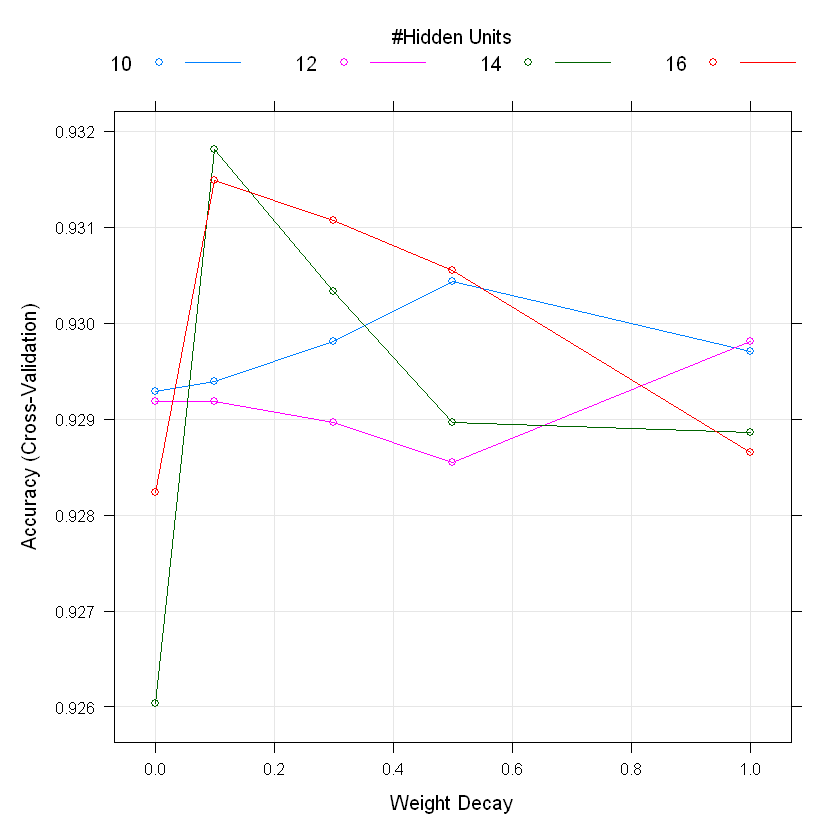

In [127]:
plot(fit.mlp)

In [154]:
prob_cv <- predict(fit.mlp, newdata=XTest_scaled,type = "prob")

# Classes prédites : 
y_pred = prob_cv %>% mutate('class'=names(.)[apply(., 1, which.max)])
head(prob_cv)

#Matrice de confusion :
y_test= as.factor(unlist(yTest))
conf2 <- confusionMatrix(as.factor(y_pred$class), Test$Class)
conf2

#F1_score 
f1_nn = F1_Score(y_test, y_pred$class, positive = NULL)

# Accuracy
accuracy_nn = conf2$overall['Accuracy']


#AUC

auc_nn = multiclass.roc(y_test , prob_cv, levels=levels(y_test))
auc_nn

# AUC = 0.996

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,0.0035395005947,0.000802515614,0.0000025124166,0.0571231531,0.00001395049522,0.9352357,0.0032826827170
5,0.0000012466361,0.000055609836,0.0000012470194,0.0011094125,0.00000050001342,0.9988295,0.0000024452905
6,0.0000021321512,0.000010582254,0.0000001027449,0.0012099345,0.00000015262818,0.9987748,0.0000022804034
10,0.0000007385378,0.000058703391,0.0000012202467,0.0146798454,0.00000110561886,0.9852176,0.0000407684610
15,0.0000010697849,0.000008775012,0.0000001715680,0.0004020357,0.00000009683615,0.9995872,0.0000006633035
18,0.0000025743791,0.000044129079,0.0000002556159,0.0030374632,0.00000092014423,0.9969110,0.0000036987305


Confusion Matrix and Statistics

          Reference
Prediction BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA
  BARBUNYA      364      0   14        0     1     1    6
  BOMBAY          0    156    0        0     0     0    0
  CALI           16      0  468        0     6     1    0
  DERMASON        1      0    0      997    10    13   72
  HOROZ           5      0    5        1   549     0   12
  SEKER           3      0    0       10     0   575    8
  SIRA            7      0    2       55    12    18  692

Overall Statistics
                                               
               Accuracy : 0.9316               
                 95% CI : (0.9234, 0.9392)     
    No Information Rate : 0.2605               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.9172               
                                               
 Mcnemar's Test P-Value : NA                   

Statistics by Class:

        


Call:
multiclass.roc.default(response = y_test, predictor = prob_cv,     levels = levels(y_test))

Data: multivariate predictor prob_cv with 7 levels of y_test: BARBUNYA, BOMBAY, CALI, DERMASON, HOROZ, SEKER, SIRA.
Multi-class area under the curve: 0.9964

In [196]:
model_scores =  c(auc_svm$auc,auc_nn$auc,auc_glm$auc,accuracy_svm,accuracy_nn,accuracy_glm,f1_svm,f1_nn,f1_glm)

In [192]:
models = c("SVM","Neurones","RL pénalisée","SVM","Neurones","RL pénalisée","SVM","Neurones","RL pénalisée")

In [218]:
metrics = c("AUC", "AUC", "AUC","Accuracy","Accuracy","Accuracy","F1-Score","F1-Score","F1-Score")

In [219]:
comparaison = data.frame(models,metrics,model_scores)
comparaison = comparaison[order(models),]
comparaison

,models,metrics,model_scores
,<chr>,<chr>,<dbl>
2,Neurones,AUC,0.9964016
5,Neurones,Accuracy,0.9316176
8,Neurones,F1-Score,0.9309463
3,RL pénalisée,AUC,0.9953801
6,RL pénalisée,Accuracy,0.9269608
9,RL pénalisée,F1-Score,0.9210867
1,SVM,AUC,0.9956398
4,SVM,Accuracy,0.9321078
7,SVM,F1-Score,0.9234694


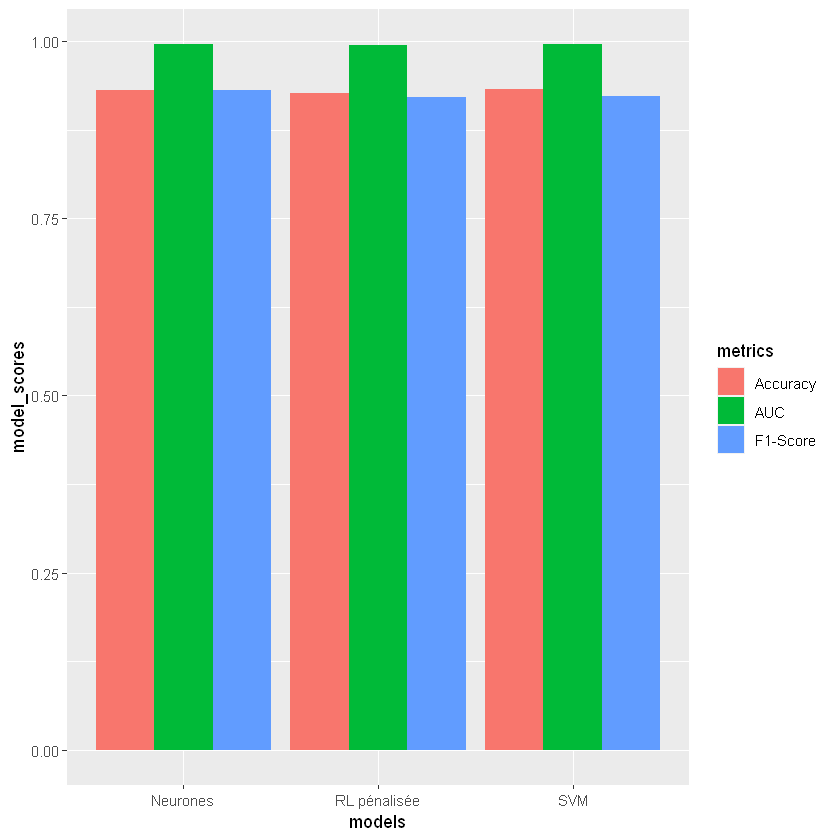

In [221]:
ggplot(comparaison,aes(fill=metrics,y=model_scores,x=models)) +
    geom_bar(position="dodge",stat = "identity")

In [170]:
library(ggplot2)

In [187]:
barplot(comparaison)

ERROR: Error in barplot.default(comparaison): 'height' must be a vector or a matrix


In [ ]:
ggplot(comparaison,aes(fill=colnames(comparaison)y=